In [1]:
import pandas as pd
df = pd.read_csv("machine_sensors.csv", encoding='latin1')
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ï»¿UDI                   10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

,ï»¿UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [2]:
print(df.columns)
df.isnull().sum()


Index(['ï»¿UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


ï»¿UDI                     0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [11]:
# Show all columns in your dataframe
print(df.columns)



Index(['ï»¿UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df.sort_values(['machine_id','timestamp'], inplace=True)


In [12]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("machine_sensors.csv")


In [13]:
# Quick look at data
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [21]:
print(df.columns)

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


In [22]:
# Convert categorical column 'Type' to numeric codes
df['Type'] = df['Type'].astype('category').cat.codes

# Fill missing values in numeric columns only
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [23]:
# Example: rolling average of tool wear (simulate time-series trend)
df['Tool_wear_roll'] = df['Tool wear [min]'].rolling(window=3, min_periods=1).mean()

# Time-to-failure metrics (if you have timestamps)
# df['Time_to_failure'] = df.groupby('Product ID')['timestamp'].diff().shift(-1)


In [24]:
X = df.drop(columns=['Machine failure', 'TWF','HDF','PWF','OSF','RNF'])
y = df['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
features = ['Air temperature [K]', 'Process temperature [K]', 
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

X = df[features]
y = df['Machine failure']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [31]:
# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]

# Evaluate
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Random Forest AUC:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Random Forest AUC: 0.9634522287175741

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.89      0.57      0.70        68

    accuracy                           0.98      2000
   macro avg       0.94      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000



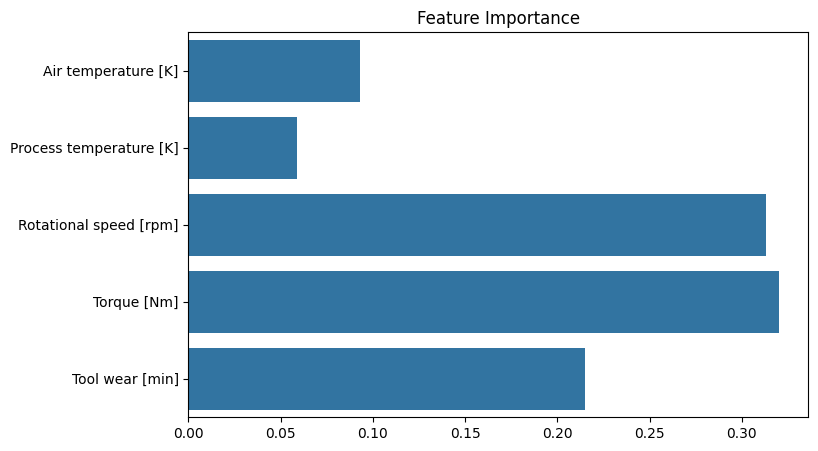

In [32]:
importances = rf.feature_importances_
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


In [34]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, auc


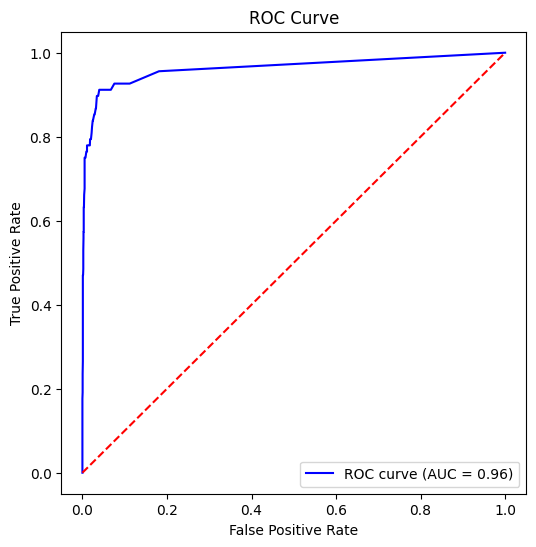

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
